##Parte 1









###ejercicio 2

####A

In [32]:
#prmero importamos lo necesario
import pandas as pd
import os

In [33]:
#os.chdir(r"C:\Users\ADOLFO\Documents\GitHub\BigDataUBA-Grupo-1\TP2")

In [34]:
# Cargamos las 2 eph
df_1= pd.read_stata("usu_individual_T105.dta")
df_2 = pd.read_excel("usu_individual_T125.xlsx")

In [35]:
#creamos una copia
df_1_a= df_1.copy()
df_2_a= df_2.copy()

In [36]:
# Reemplazamos variables categroricas en texto por numero
df_1_a["region"] = df_1_a["region"].replace({"Gran Buenos Aires":1})
df_1_a["ch04"] = df_1_a["ch04"].replace({"Varón":1,"Mujer":2})
df_1_a["ch06"] = df_1_a["ch06"].replace({"Menos de 1 año":-1,"98 y más años":98})
df_1_a["ch07"] = df_1_a["ch07"].replace({"Unido":1,"Casado":2,"Separado o divorciado":3,"Viudo":4,"Soltero":5,"Ns./Nr.":0})
df_1_a["ch08"] = df_1_a["ch08"].replace({"Obra social (incluye PAMI)":1,"Mutual/Prepaga/Servicio de emergencia":2,"Planes y seguros públicos":3,"No paga ni le descuentan":4,
                                         "Ns./Nr.":9,"Obra social y mutual/prepaga/servicio de emergencia":12,"Obra social y planes y seguros públicos":13,
                                         "Mutual/prepaga/servicio de emergencia/planes y seguros públi":23,
                                         "Obra social, mutual/prepaga/servicio de emergencia y planes":123})
df_1_a["nivel_ed"] = df_1_a["nivel_ed"].replace({"Primaria Incompleta (incluye educación especial)":1,"Primaria Completa":2,"Secundaria Incompleta":3,"Secundaria Completa":4,
                                                 "Superior Universitaria Incompleta":5,"Superior Universitaria Completa":6,"Sin instrucción":7,"Ns./ Nr.":9})
df_1_a["estado"] = df_1_a["estado"].replace({"Entrevista individual no realizada (no respuesta al cuestion":0,"Ocupado":1,"Desocupado":2,"Inactivo":3,"Menor de 10 años":4})
df_1_a["cat_inac"] = df_1_a["cat_inac"].replace({"Jubilado/pensionado":1,"Rentista":2,"Estudiante":3,"Ama de casa":4,"Menor de 6 años":5,"Discapacitado":6,"Otros":7})
df_1_a["pp10a"] = df_1_a["pp10a"].replace({"...menos de 1 mes?":1,"...de 1 a 3 meses?":2,"...más de 3 a 6 meses?":3,"...más de 6 a 12 meses?":4,"...más de 1 año?":5})
df_1_a["pp03j"] = df_1_a["pp03j"].replace({"Sí":1,"No":2,"Ns./Nr.":9})
df_1_a["pp04a"] = df_1_a["pp04a"].replace({"...estatal?":1,"...privada?":2,"...de otro tipo? (especificar)":3,"Ns./Nr.":0})
   #df_2
df_2_a["PP10A"] = df_2_a["PP10A"].fillna(0)
df_2_a["PP03J"] = df_2_a["PP03J"].fillna(9)
df_2_a["PP04A"] = df_2_a["PP04A"].fillna(0)
df_2_a["P47T"] = df_2_a["P47T"].fillna(-9)


C:\Users\ADOLFO\AppData\Local\Temp\ipykernel_3824\3455944364.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_1_a["region"] = df_1_a["region"].replace({"Gran Buenos Aires":1})
C:\Users\ADOLFO\AppData\Local\Temp\ipykernel_3824\3455944364.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1_a["ch04"] = df_1_a["ch04"].replace({"Varón":1,"Mujer":2})
C:\Users\ADOLFO\AppData\Local\Temp\ipykernel_3824\3455944364.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, 

In [37]:
# En el primero df tenemos los nombres en minuscula, por lo cual primero renombramos las columnas de interes a mayuscula
df_1_a1=df_1_a.copy() #para no alterar la celda anterior al cambiar los nombres
df_1_a1.columns = df_1_a1.columns.str.upper()

In [38]:
# Vemos los cambio
df_1_a1

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,125098,1.0,1.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1017.0,...,08,,07,08,,05,0.0,0.0,0.0,00000
1,125188,1.0,1.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,40020
2,125188,1.0,2.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
3,125188,1.0,3.0,0.0,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
4,125242,1.0,1.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1103.0,...,09,,09,09,,07,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47025,288015,1.0,3.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,129.0,...,09,10,09,,10,07,0.0,0.0,0.0,00000
47026,288015,1.0,4.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,129.0,...,09,10,09,,10,07,0.0,0.0,0.0,00000
47027,288294,1.0,1.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,107.0,...,10,10,09,,10,09,0.0,0.0,0.0,00000
47028,288294,1.0,2.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,107.0,...,10,10,09,,10,09,0.0,0.0,0.0,00000


In [39]:
# Fitramos unicamente los datos para la región seleccionada
df_1_b= df_1_a1[df_1_a1["REGION"] == 1].copy()
df_2_b= df_2_a[df_2_a["REGION"] == 1].copy()

In [40]:
# Seleccionamos las 15 variables de interes
variables_de_interes = ['CODUSU','REGION','ANO4','CH04','CH06','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC','PP10A','PP03J','PP04A','P21','P47T','ITF','IPCF']
df_1_c= df_1_b[variables_de_interes].copy()
df_2_c= df_2_b[variables_de_interes].copy()

In [41]:
# Observamos el tipo de dato almacenado por variable en cada df, para ello armamos un cuadro comparativo
    # Tipos de datos por df
tipos_df1 = df_1_c.dtypes.astype(str)
tipos_df2 = df_2_c.dtypes.astype(str)

In [42]:
    # Creamos el df comparativo
comparativo_datos = pd.DataFrame({
    "df_1_c": tipos_df1[variables_de_interes],
    "df_2_c": tipos_df2[variables_de_interes]
})

In [43]:
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos = comparativo_datos.set_index(pd.Index(variables_de_interes))
print(comparativo_datos)

            df_1_c   df_2_c
CODUSU      object   object
REGION    category    int64
ANO4       float64    int64
CH04      category    int64
CH06      category    int64
CH07      category    int64
CH08      category  float64
NIVEL_ED  category    int64
ESTADO    category    int64
CAT_INAC  category    int64
PP10A     category  float64
PP03J     category  float64
PP04A     category  float64
P21        float64    int64
P47T       float64  float64
ITF        float64    int64
IPCF       float64  float64


In [44]:
# Compatibilizamos los tipos de datos en ambas variables
    # codusu: pasamos los datos de df_1 a str
df_1_c['CODUSU'] =df_1_c['CODUSU'].astype(str)
    # region: pasamos los datos de df_1 a int64
df_1_c['REGION'] =df_1_c['REGION'].astype(str).astype(int)
    # ano4: pasamos los datos de df_1 a int64
df_1_c['ANO4'] = df_1_c['ANO4'].astype(int)
    # ch04: pasamos los datos de df_1 a int64
df_1_c['CH04'] = df_1_c['CH04'].astype(int)
    # ch06: pasamos los datos de df_1 a int64
df_1_c['CH06'] = df_1_c['CH06'].astype(int)
    #ch07: pasamos los datos de df_1 a int64
df_1_c['CH07'] = df_1_c['CH07'].astype(int)
    #ch08: pasamos los datos de df_1 a int64
df_1_c['CH08'] = df_1_c['CH08'].astype(int)
    #NIVEL_ED: pasamos los datos de_1 a int64
df_1_c['NIVEL_ED'] = df_1_c['NIVEL_ED'].astype(int)
    #estado: pasamos los datos de df_1 a int64
df_1_c['ESTADO'] = df_1_c['ESTADO'].astype(int)
    #cat_inac: pasamos los datos de df_1 a int64
df_1_c['CAT_INAC'] = df_1_c['CAT_INAC'].astype(int)
    #pp10a: pasamos los datos de df_1 a int64
df_1_c['PP10A'] = df_1_c['PP10A'].astype(int)
    #pp03j: pasamos los datos de df_1 a int64
df_1_c['PP03J'] = df_1_c['PP03J'].astype(int)
    #pp04a: pasamos los datos de df_1 a int64
df_1_c['PP04A'] = df_1_c['PP04A'].astype(int)
    #p21: pasamos los datos de df_1 a int64
df_1_c['P21'] = df_1_c['P21'].astype(int)
    #p47t: pasamos los datos de df_1 a int64
df_1_c['P47T'] = df_1_c['P47T'].astype(int)
    #itf: pasamos los datos de df_1 a int64
df_1_c['ITF'] = df_1_c['ITF'].astype(int)
    #ipcf: pasamos los datos de df_1 a int64
df_1_c['IPCF'] = df_1_c['IPCF'].astype(int)


 #df_2
    #ch08: pasamos los datos de df_2 a int64
df_2_c['CH08'] = df_2_c['CH08'].astype(int)
    #pp10a: pasamos los datos de df_2 a int64
df_2_c['PP10A'] = df_2_c['PP10A'].astype(int)
    #pp03j: pasamos los datos de df_2 a int64
df_2_c['PP03J'] = df_2_c['PP03J'].astype(int)
    #pp04a: pasamos los datos de df_2 a int64
df_2_c['PP04A'] = df_2_c['PP04A'].astype(int)
    #p47t: pasamos los datos de df_2 a int64
df_2_c['P47T'] = df_2_c['P47T'].astype(int)
    #ipcf: pasamos los datos de df_2 a int64
df_2_c['IPCF'] = df_2_c['IPCF'].astype(int)






In [45]:
# Corroboramos que ahora todos los tipos de datos sean iguales

tipos_df1_a = df_1_c.dtypes.astype(str)
tipos_df2_a= df_2_c.dtypes.astype(str)

    # Creamos el df comparativo
comparativo_datos_a = pd.DataFrame({
    "df_1_c": tipos_df1_a,
    "df_2_c": tipos_df2_a
})
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos_a = comparativo_datos_a.set_index(pd.Index(variables_de_interes))
print("Vemos los datos compatibilizados")
print(comparativo_datos_a)

Vemos los datos compatibilizados
          df_1_c  df_2_c
CODUSU    object  object
REGION     int64   int64
ANO4       int64   int64
CH04       int64   int64
CH06       int64   int64
CH07       int64   int64
CH08       int64   int64
NIVEL_ED   int64   int64
ESTADO     int64   int64
CAT_INAC   int64   int64
PP10A      int64   int64
PP03J      int64   int64
PP04A      int64   int64
P21        int64   int64
P47T       int64   int64
ITF        int64   int64
IPCF       int64   int64


In [46]:
# en este paso adjuntamos al final los datos de las dos base de datos
df_comp= pd.concat([df_1_c, df_2_c])
print(df_comp.shape)
df_comp

(16665, 17)


,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,PP10A,PP03J,PP04A,P21,P47T,ITF,IPCF
0,125098,1,2005,1,80,4,1,3,3,1,0,0,0,0,583,583,583
1,125188,1,2005,1,26,2,4,4,1,0,0,1,2,300,450,450,150
2,125188,1,2005,2,27,2,4,6,3,4,0,0,0,0,0,450,150
3,125188,1,2005,2,-1,5,4,7,4,5,0,0,0,0,0,450,150
4,125242,1,2005,2,71,4,1,2,3,1,0,0,0,0,855,855,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45259,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,49,2,1,3,1,0,0,2,2,700000,700000,0,0
45260,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,51,2,1,6,1,0,0,9,2,500000,500000,0,0
45261,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,22,5,1,6,1,0,0,1,2,-9,-9,0,0
45262,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,26,5,1,3,3,3,0,9,0,0,0,0,0


In [47]:
# Corroboramos que se hayan unido correctamente ambas base
print(df_1_c.shape)
print(df_2_c.shape)
print(df_comp.shape)


(9484, 17)
(7181, 17)
(16665, 17)


####B

In [48]:
#imporatmos las expanciones necesarias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
#hacemos una copia para no alterar la base original
df_comp_1 = df_comp.copy()

In [50]:
# en este paso tranformaremos todas las columnas donde antes convertimos el NaN(valores faltantes) en numeros de vuelta en Nan
cols = ["CH07","CH08","NIVEL_ED","PP03J","PP10A","PP04A","P47T"]
df_comp_1[cols] = df_comp_1[cols].replace([9, 0], np.nan)

print(df_comp_1)

                              CODUSU  REGION  ANO4  CH04  CH06  CH07  CH08  \
0                           125098         1  2005     1    80   4.0   1.0   
1                           125188         1  2005     1    26   2.0   4.0   
2                           125188         1  2005     2    27   2.0   4.0   
3                           125188         1  2005     2    -1   5.0   4.0   
4                           125242         1  2005     2    71   4.0   1.0   
...                              ...     ...   ...   ...   ...   ...   ...   
45259  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     1    49   2.0   1.0   
45260  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2    51   2.0   1.0   
45261  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2    22   5.0   1.0   
45262  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     1    26   5.0   1.0   
45263  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2     6   5.0   1.0   

       NIVEL_ED  ESTADO  CAT_INAC  PP10A  PP03J  PP04A     P21 

In [51]:
# creamos copia para no afactar la df
df_comp_1_a = df_comp_1.copy()

In [52]:
# Contar valores faltantes por año y columna
df_comp_1_a= df_comp_1_a.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)

C:\Users\ADOLFO\AppData\Local\Temp\ipykernel_3824\2025000446.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_comp_1_a= df_comp_1_a.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)


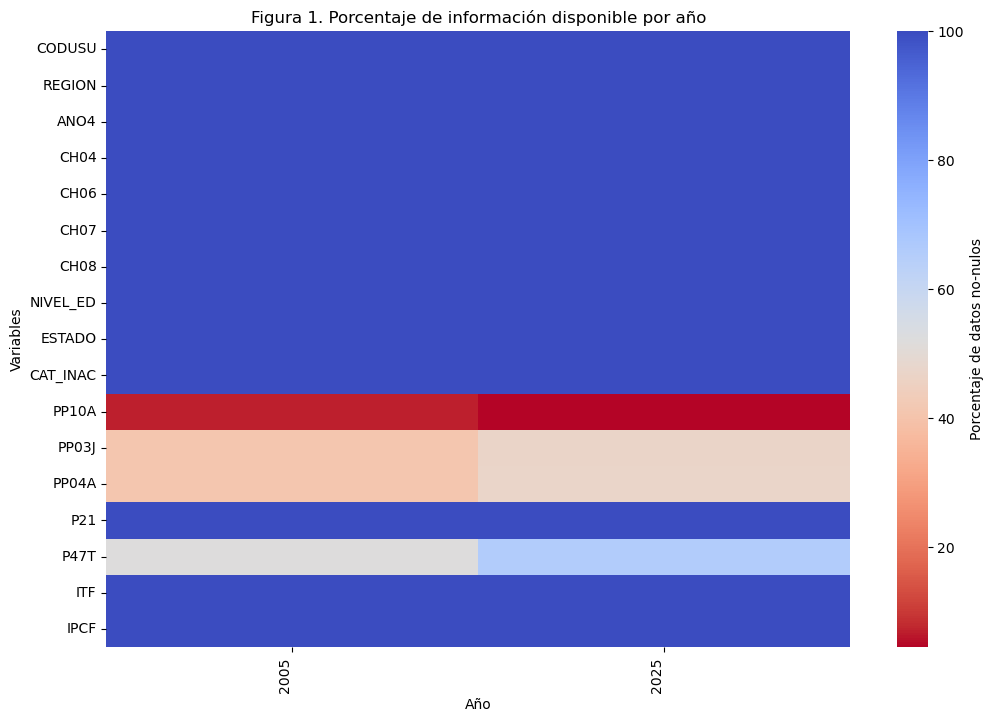

In [53]:
# en este paso desiñaremos como se compone la figura de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_comp_1_a.T, annot=False, cmap="coolwarm_r",cbar_kws={'label': 'Porcentaje de datos no-nulos'})
plt.title("Figura 1. Porcentaje de información disponible por año")
plt.xlabel("Año")
plt.xticks(rotation=90, ha='right')
plt.ylabel("Variables")
plt.yticks(rotation=0)
plt.show()

####C

In [54]:
#creamos una copia para no alterar la base datos
df_comp_2= df_comp.copy()

In [55]:
# coregiremos las varibles que tienen volores sinsentido y los tranformaremos NaN, la cuales en la eph se representan como -9,-8,-7,0 y 9
vars_interes_1=['CH04','CH06','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC','PP03J','PP10A','PP04A']
vars_interes_2=['P21','P47T','ITF','IPCF']
df_comp_2[vars_interes_1] = df_comp_2[vars_interes_1].replace([-9, -8, -7,0,9], np.nan)
df_comp_2[vars_interes_2] = df_comp_2[vars_interes_2].replace([-9, -8, -7], np.nan)
df_comp_2

,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,PP10A,PP03J,PP04A,P21,P47T,ITF,IPCF
0,125098,1,2005,1,80.0,4.0,1.0,3,3.0,1.0,NaN,NaN,NaN,0.0,583.0,583,583
1,125188,1,2005,1,26.0,2.0,4.0,4,1.0,NaN,NaN,1.0,2.0,300.0,450.0,450,150
2,125188,1,2005,2,27.0,2.0,4.0,6,3.0,4.0,NaN,NaN,NaN,0.0,0.0,450,150
3,125188,1,2005,2,-1.0,5.0,4.0,7,4.0,5.0,NaN,NaN,NaN,0.0,0.0,450,150
4,125242,1,2005,2,71.0,4.0,1.0,2,3.0,1.0,NaN,NaN,NaN,0.0,855.0,855,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45259,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,49.0,2.0,1.0,3,1.0,NaN,NaN,2.0,2.0,700000.0,700000.0,0,0
45260,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,51.0,2.0,1.0,6,1.0,NaN,NaN,NaN,2.0,500000.0,500000.0,0,0
45261,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,22.0,5.0,1.0,6,1.0,NaN,NaN,1.0,2.0,NaN,NaN,0,0
45262,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,26.0,5.0,1.0,3,3.0,3.0,NaN,NaN,NaN,0.0,0.0,0,0


In [56]:
#ver cuantas valores NaN tiene cada variavle
print(df_comp_2.isna().sum())

CODUSU          0
REGION          0
ANO4            0
CH04            0
CH06          257
CH07            4
CH08           35
NIVEL_ED        0
ESTADO         51
CAT_INAC     8321
PP10A       15688
PP03J        9418
PP04A        9383
P21           919
P47T         1353
ITF             0
IPCF            0
dtype: int64


In [57]:
#  ademas corrigiremos valores que no tienen sentido, cuando cumplen ciertas condiciones
df_comp_2.loc[(df_comp_2['ITF'] == 0) & ((df_comp_2['P47T'] > 0) | (df_comp_2["ESTADO"]==1)), 'ITF'] = np.nan #la variable "itf"(ingreso total familia) es igual a 0 sera NaN si la variable "p47t"(ingreso total de ocupacion como no ocupacion) es mayor a "0", o cuando la variable "estado" es igual a 1(ocupado)
df_comp_2.loc[(df_comp_2['IPCF'] == 0) & ((df_comp_2['P47T'] > 0) | (df_comp_2["ESTADO"]==1)), 'IPCF'] = np.nan #la variable "ipcf"(ingreso per capital familia) es igual a 0 sera NaN si la variable "p47t"(ingreso total de ocupacion como no ocupacion) es mayor a "0", o cuando la variable "estado" es igual a 1(ocupado)

In [58]:
#ver cuantas valores NaN tiene cada variavle, con la nueva condicion
print(df_comp_2.isna().sum())

CODUSU          0
REGION          0
ANO4            0
CH04            0
CH06          257
CH07            4
CH08           35
NIVEL_ED        0
ESTADO         51
CAT_INAC     8321
PP10A       15688
PP03J        9418
PP04A        9383
P21           919
P47T         1353
ITF          1702
IPCF         1702
dtype: int64


In [59]:
# hacemos una copia para no alterar el df
df_comp_2_a= df_comp_2.copy()

In [60]:
#ahora vremos como seria el grafico de heatmap con la correcion de las variables incoerentes
   # Contar valores faltantes por año y columna
df_comp_2_a = df_comp_2_a.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)

C:\Users\ADOLFO\AppData\Local\Temp\ipykernel_3824\46260248.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_comp_2_a = df_comp_2_a.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)


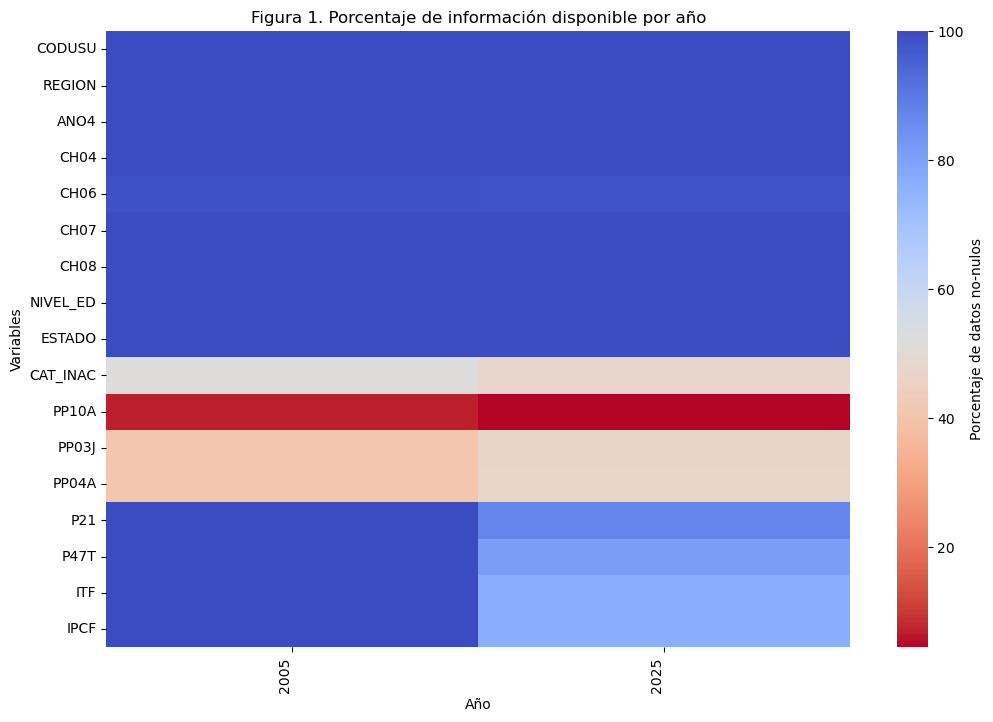

In [61]:
   # en este paso desiñaremos como se compone la figura de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_comp_2_a.T, annot=False, cmap="coolwarm_r",cbar_kws={'label': 'Porcentaje de datos no-nulos'})
plt.title("Figura 1. Porcentaje de información disponible por año")
plt.xlabel("Año")
plt.xticks(rotation=90, ha='right')
plt.ylabel("Variables")
plt.yticks(rotation=0)
plt.show()

####D

In [62]:
# Cargamos las 2 eph de hogares
df_3= pd.read_stata("usu_hogar_T105.dta")
df_4 = pd.read_excel("usu_hogar_T125.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'usu_hogar_T105.dta'

In [ ]:
df_3_a= df_3.copy()
df_4_a= df_4.copy()

In [ ]:
# Reemplazamos variables categroricas en texto por numero Gran Buenos Aires
df_3_a["region"] = df_3_a["region"].replace({"Gran Buenos Aires":1})

In [ ]:
# En el tercer df tenemos los nombres en minuscula, por lo cual primero renombramos las columnas de interes a mayuscula
df_3_a1=df_3_a.copy() #para no alterar la celda anterior al cambiar los nombres
df_3_a1.columns = df_3_a1.columns.str.upper()

In [ ]:
# Fitramos unicamente los datos para la región seleccionada
df_3_b= df_3_a1[df_3_a1["REGION"] == 1].copy()
df_4_b= df_4_a[df_4_a["REGION"] == 1].copy()

In [ ]:
# Seleccionamos las 5 variables de interes
variables_de_interes_1 = ["CODUSU","IV1", "IV2", "IV6", "IV8" , "II8"]
df_3_c= df_3_b[variables_de_interes_1].copy()
df_4_c= df_4_b[variables_de_interes_1].copy()

In [ ]:
# Observamos el tipo de dato almacenado por variable en cada df, para ello armamos un cuadro comparativo
    # Tipos de datos por df
tipos_df3 = df_3_c.dtypes.astype(str)
tipos_df4 = df_4_c.dtypes.astype(str)

In [ ]:
    # Creamos el df comparativo
comparativo_datos_1 = pd.DataFrame({
    "df_3_c": tipos_df3[variables_de_interes_1],
    "df_4_c": tipos_df4 [variables_de_interes_1]
})

In [ ]:
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos_1= comparativo_datos_1.set_index(pd.Index(variables_de_interes_1))
print(comparativo_datos_1)

In [ ]:
#observemos que variables unicas hay en cada df
for col in df_3_c.columns:
    print(f"Columna '{col}': {df_3_c[col].unique()}")

In [ ]:
#observemos que variables unicas hay en cada df
for col in df_4_c.columns:
    print(f"Columna '{col}': {df_4_c[col].unique()}")

In [ ]:
#copia para no alterara el df anterior
df_3_c_1= df_3_c.copy()
df_4_c_1= df_4_c.copy()

In [ ]:
# Reemplazamos variables categroricas en texto por numero en el df3 y unificar los df en un solo tipo de varible
df_3_c_1["IV1"] = df_3_c_1["IV1"].replace({'Departamento':2, 'Casa':1, 'Pieza en hotel/pensión':4, 'Pieza de inquilinato':3, 'Otro':6, 'Local no construido para habitación':5})
df_3_c_1['IV2']=  df_3_c_1['IV2'].replace({'Ns./Nr.':0})
df_3_c_1['IV6']=  df_3_c_1['IV6'].replace({'Ns./Nr.':0,'Por cañería dentro de la vivienda':1, 'Fuera de la vivienda pero dentro del terreno':2, 'Fuera del terreno':3})
df_3_c_1['IV8']=  df_3_c_1['IV8'].replace({'Ns./Nr.':0,'No':2, 'Sí':1})
df_3_c_1['II8']=  df_3_c_1['II8'].replace({'Ns./Nr.':0,'Gas de red':1, 'Gas de tubo/garrafa':2, 'Ns./Nr.':0, 'Otro':4, 'Kerosene/leña/carbón':3})


In [ ]:
# Compatibilizamos los tipos de datos en ambas variables
    # IV1: pasamos los datos de df_3 a str
df_3_c_1["IV1"] =df_3_c_1["IV1"].astype(int)
    # IV2: pasamos los datos de df_3 a int64
df_3_c_1["IV2"] =df_3_c_1["IV2"].astype(int)
    # IV6: pasamos los datos de df_3 a int64
df_3_c_1["IV6"] =df_3_c_1["IV6"].astype(int)
    # IV8: pasamos los datos de df_3 a int64
df_3_c_1["IV8"] =df_3_c_1["IV8"].astype(int)
    # II8: pasamos los datos de df_3 a int64
df_3_c_1["II8"] =df_3_c_1["II8"].astype(int)

In [ ]:
tipos_df3_1 = df_3_c_1.dtypes.astype(str)
tipos_df4_1= df_4_c_1.dtypes.astype(str)

In [ ]:
   # Creamos el df comparativo
comparativo_datos_1_a = pd.DataFrame({
    "df_3_c_1": tipos_df3_1[variables_de_interes_1],
    "df_4_c_1": tipos_df4_1[variables_de_interes_1]
})

In [ ]:
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos_1_a= comparativo_datos_1_a.set_index(pd.Index(variables_de_interes_1))
print(comparativo_datos_1_a)

In [ ]:
# en este paso adjuntamos al final los datos de las dos base de datos
df_comp_hog= pd.concat([df_3_c_1,df_4_c_1])
print(df_comp_hog.shape)
df_comp_hog

In [ ]:
# Corroboramos que se hayan unido correctamente ambas base
print(df_3_c_1.shape)
print(df_4_c_1.shape)
print(df_comp_hog.shape)

In [ ]:
df_comp_hogs_1= df_comp_hog.copy()

In [ ]:
# coregiremos las varibles que tienen volores sinsentido y los tranformaremos NaN, la cuales en la eph se representan como -9,-8,-7,0 y 9
vars_interes_h=["IV1", "IV2", "IV6", "IV8" , "II8"]
df_comp_hogs_1[vars_interes_h] = df_comp_hogs_1[vars_interes_h].replace([0], np.nan)
df_comp_hogs_1

In [ ]:
df_comp_indidual= df_comp_2.copy()
df_comp_hogar= df_comp_hogs_1.copy()

In [ ]:
# uniremos las base de datos de individuos con la de hogares
 #union por intersección
df_interseccion = pd.merge(df_comp_indidual,df_comp_hogar ,on="CODUSU", how='inner')
print(df_interseccion)

In [ ]:
df_interseccion.drop_duplicates(inplace=True)
df_interseccion

In [ ]:
df_interseccion.reset_index(drop=True, inplace=True) # inplace guarda el resultado
df_interseccion

In [ ]:
   # ver el totol de Nas
   total_nas = df_interseccion.isna().sum().sum()
print("Total de NAs:", total_nas)

In [ ]:
 #unir por izquierda
df_izquierdad = pd.merge(df_comp_indidual,df_comp_hogar ,on="CODUSU", how='left')
print(df_izquierdad )

In [ ]:
df_izquierdad.reset_index(drop=True, inplace=True) # inplace guarda el resultado
df_izquierdad

In [ ]:
   # ver el totol de Nas
   total_nas = df_izquierdad.isna().sum().sum()
print("Total de NAs:", total_nas)

In [ ]:
#unir por derecha
df_derecha = pd.merge(df_comp_indidual,df_comp_hogar ,on="CODUSU", how='right')
print(df_derecha)

In [ ]:
df_derecha.reset_index(drop=True, inplace=True) # inplace guarda el resultado
df_derecha

In [ ]:
   # ver el totol de Nas
   total_nas = df_derecha.isna().sum().sum()
print("Total de NAs:", total_nas)

In [ ]:
#union conjunta
df_conjunto = pd.merge(df_comp_indidual,df_comp_hogar ,on="CODUSU", how='outer')
print(df_conjunto)

In [ ]:
df_conjunto.reset_index(drop=True, inplace=True) # inplace guarda el resultado
df_conjunto

In [ ]:
   # ver el totol de Nas
   total_nas = df_conjunto.isna().sum().sum()
print("Total de NAs:", total_nas)

##Parte 2

###ejercicio 3

In [ ]:
# fusionamos los datos de las dos fuentes de datos originales
df_comp = pd.concat([df_1_c, df_2_c])
print(df_comp.shape)
df_comp

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Paso 1: Filtrar los datos para los años 2005 y 2025
df_filtered_years = df_comp[df_comp['ANO4'].isin([2005, 2025])].copy()

# Paso 2: Asignamos códigos numéricos de sexo a etiquetas descriptivas
sex_mapping = {1: 'Varón', 2: 'Mujer'}
df_filtered_years['SEXO_DESC'] = df_filtered_years['CH04'].map(sex_mapping)

# Paso 3: Agrupamos por año y sexo, y contamos
sex_composition = df_filtered_years.groupby(['ANO4', 'SEXO_DESC']).size().unstack(fill_value=0)

# Paso 4: Creamos el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

sex_composition.plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'])

# Agregamos título y etiquetas
ax.set_title("Figura 2. Composición por sexo en Gran Buenos Aires (2005 vs 2025)")
ax.set_xlabel("Año")
ax.set_ylabel("Número de Individuos")
ax.tick_params(axis='x', rotation=0)

# Añadimos las etiquetas de datos a las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# agregamos leyenda
ax.legend(title="Sexo")



plt.tight_layout()
plt.show()

###ejercicio 4

In [ ]:
#Filtramos el marco de datos combinado df_comp para incluir solo los años 2005 y 2025.

df_filtered_years = df_comp[df_comp['ANO4'].isin([2005, 2025])].copy()
display(df_filtered_years.head())

In [ ]:
#Seleccionamos las variables especificadas ( CH04, CH06, CH07, CH08, NIVEL_ED, ESTADO, CAT_INAC, IPCF) del marco de datos filtrado.

correlation_variables = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
df_correlation_subset = df_filtered_years[correlation_variables].copy()
display(df_correlation_subset.head())

In [ ]:
#Creamos variables dummies para las variables categóricas entre las seleccionadas ( CH04, CH07, CH08, NIVEL_ED, ESTADO, CAT_INAC)

categorical_cols = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC']
df_dummies = pd.get_dummies(df_correlation_subset, columns=categorical_cols, drop_first=True)
display(df_dummies.head())

In [ ]:
#Combinamos variables numéricas y dummies

#Concatenamos las variables numéricas ( CH06, IPCF) con las variables dummies almacenadas en df_dummies

numerical_cols = ['CH06', 'IPCF']
df_numerical = df_correlation_subset[numerical_cols]
df_combined = pd.concat([df_numerical, df_dummies], axis=1)
display(df_combined.head())

In [ ]:
#Calculamos la matriz de correlación para el marco de datos combinado df_combined.

correlation_matrix = df_combined.corr()
display(correlation_matrix.head())

In [ ]:
#Generamos un mapa de calor de la matriz de correlación

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Matriz de correlación de variables seleccionadas (2005 y 2025)")
plt.show()

##Parte 3



df_comp shape: (16665, 17)
no respondieron shape: (16665, 18)


no respondieron shape: (2985, 18)
respondieron shape: (13680, 18)


coeficientes nulos:  161


Base con coeficientes nulos: 
                               CODUSU  REGION  ANO4  CH04  CH06  CH07  CH08  \
3                           125188         1  2005     2    -1     5     4   
38                          127247         1  2005     2    -1     5     1   
135                         134746         1  2005     2    -1     5     2   
154                         135980         1  2005     1    -1     5     1   
322                         145699         1  2005     2    -1     5     2   
...                              ...     ...   ...   ...   ...   ...   ...   
15296  TQSMNOPVPHJOOMCDEIJAH00872959       1  2025     2    -1     5     4   
15612  TQRMNORRXHLNKMCDEIIAD00874236       1  2025     2    -1     5     1   
15811  TQRMNOTSTHKOMTCDEIJAH00862382       1  2025     1    -1     5     4   
16157  TQRMNORTQHLOSNCDEIJAH

C:\Users\ADOLFO\AppData\Local\Temp\ipykernel_3824\3754055560.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[151.7518 137.3969 881.801  ... 674.6803 674.6803 674.6803]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  respondieron.loc[respondieron['ANO4'] == 2005, 'ingreso_necesario'] = (cbt2005 * respondieron.loc[respondieron['ANO4'] == 2005, 'ad_equiv_hogar'])


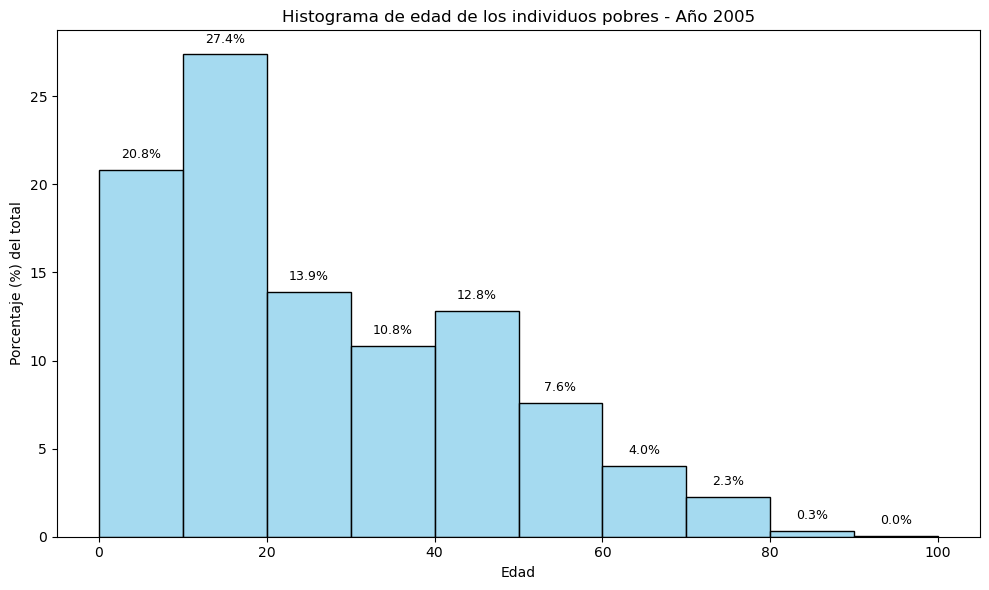

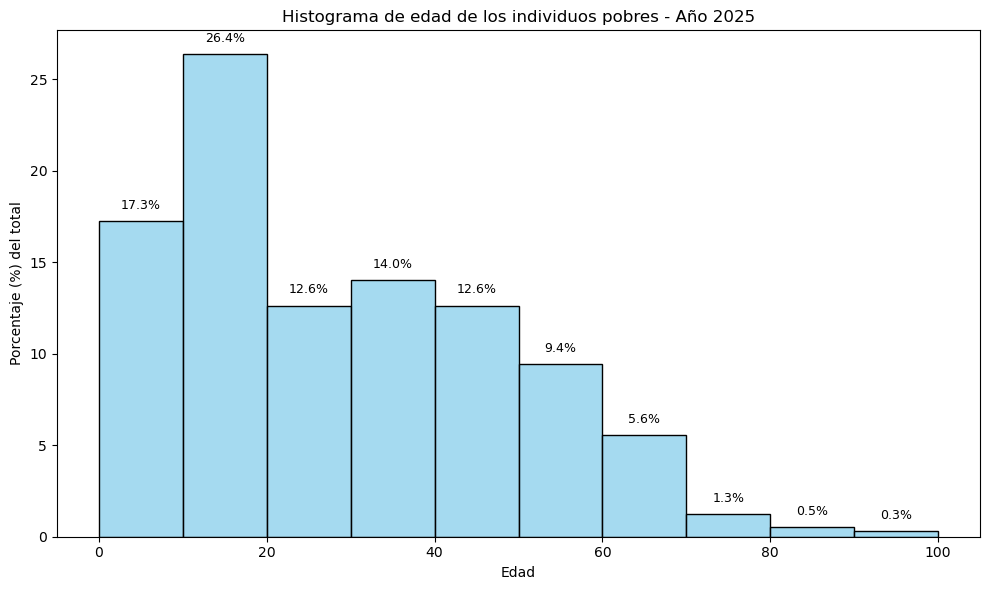

C:\Users\ADOLFO\AppData\Local\Temp\ipykernel_3824\3754055560.py:227: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen2 = ((respondieron[respondieron['ANO4'] == 2005].groupby(['rango_edad', 'pobre'])['activo'].mean() * 100).reset_index())# guardamos un df agrupando por los rangos de edad, para pobres y no pobres y calculamos el promedio de activos


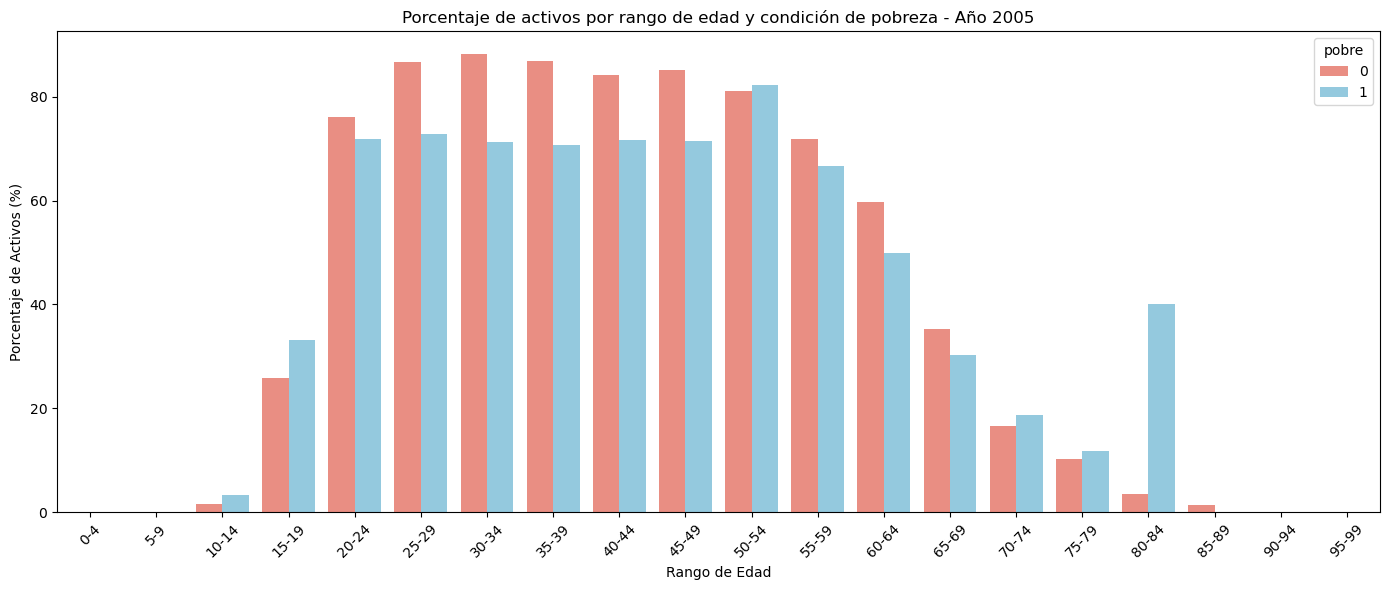

C:\Users\ADOLFO\AppData\Local\Temp\ipykernel_3824\3754055560.py:254: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen2 = ((respondieron[respondieron['ANO4'] == 2005].groupby(['rango_edad', 'pobre'])['activo'].mean() * 100).reset_index())# guardamos un df agrupando por los rangos de edad, para pobres y no pobres y calculamos el promedio de activos


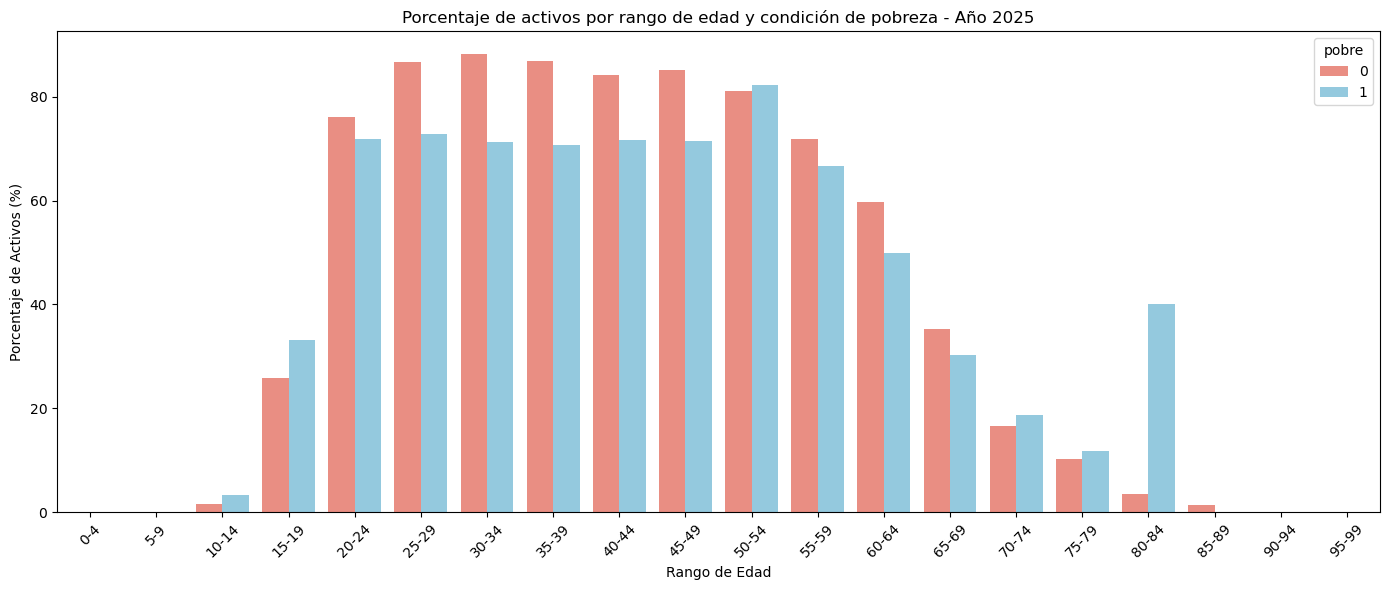

In [154]:
# Cargamos los datos de la tabla de adulto equivalente
adult_equiv = pd.read_excel("tabla_adulto_equiv.xlsx")
# Nos quedamos con las filas que contienen los datos utiles
adult_equiv1 = adult_equiv.loc[4:26].reset_index(drop=True)
# Armamos la variable para realizar la equivalencia entre la base de la eph y los coeficientes de la tabla de adulto equivalente
adult_equiv1["edad"] = adult_equiv1["Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad"].str[:2] # Extraemos la edad
adult_equiv1.at[0, "edad"] = 0 # Corregimos a mano los valores que hacen falta
adult_equiv1.at[1, "edad"] = 1
adult_equiv1.at[22, "edad"] = 76
adult_equiv1 = adult_equiv1.rename(columns={"Unnamed: 1": "coef_ch04_2","Unnamed: 2": "coef_ch04_1"})
adult_equiv1['edad'] = adult_equiv1['edad'].astype(int) # Cambiamos el tipo de dato
adult_equiv1["edad1"] = adult_equiv1["edad"].shift(-1, fill_value=121) -1 # Columna auxiliar 
# Creamos una tabla con todas las edades y los coeficientes asociados para varón y mujer
rows = []
for _, row in adult_equiv1.iterrows():
    for edad in range(int(row["edad"]), int(row["edad1"]) + 1):
        rows.append({
            "edad": edad,
            "coef_ch04_2": row["coef_ch04_2"],
            "coef_ch04_1": row["coef_ch04_1"]
        })
equivalencia = pd.DataFrame(rows) 
equivalencia_largo = pd.concat([ # Pivotamos la tabla y renombramos las columnas para que coincida con df_comp
    equivalencia[["edad", "coef_ch04_1"]].rename(columns={"coef_ch04_1": "adulto_equiv"}).assign(CH04=1),
    equivalencia[["edad", "coef_ch04_2"]].rename(columns={"coef_ch04_2": "adulto_equiv"}).assign(CH04=2)
], ignore_index=True) 
equivalencia_largo.rename(columns={"edad": "CH06"}, inplace=True)

# Realizamos la unión de los datos de la eph con los coeficientes correspondientes
df_comp1 = df_comp.merge(
    equivalencia_largo,
    how="left",
    on=["CH06", "CH04"]
)
# Comprobamos que la unión se haya realizado correctamente
print("\n")
print("df_comp shape:", df_comp.shape)
print("no respondieron shape:", df_comp1.shape)

### FALTA DE RESPUESTA 
# Separamos la base de datos entre los que respondieron y no respondieron ingreso familiar 
norespondieron = df_comp1[df_comp1["ITF"] == 0]
print("\n")
print("no respondieron shape:",norespondieron.shape)
respondieron = df_comp1[df_comp1["ITF"] != 0]
print("respondieron shape:", respondieron.shape)
# Continuamos trabajando con la base respondieron

### MEDICIÓN DE POBREZA
# Vemos si tenemos coeficientes faltantes para algunas observaciones
print("\n")
print("coeficientes nulos: ", respondieron["adulto_equiv"].isna().sum())
print("\n")
print("Base con coeficientes nulos: \n", respondieron[respondieron["adulto_equiv"].isna()])
# Vemos que existen 161 casos fallidos que se corresponden con un CH06 = -1, utilizado para marcar la ausencia de respuesta
res_group_nan = respondieron.groupby("CODUSU")["adulto_equiv"].transform(lambda x: x.isna().any()) # Marcamos los hogares que tienen algún miembro sin coeficiente asociado (máscara booleana)
respondieron = respondieron[~res_group_nan] # Nos quedamos con los hogares que no tienen individuos sin coeficiente
# Corroboramos que haya funcionado bien
print("\n")
print("coeficientes nulos: ", respondieron["adulto_equiv"].isna().sum())
print("respondieron shape:", respondieron.shape)
# Nos quedamos con 12866 observaciones
# Creamos la columna que totaliza los adultos equivalentes que componen cada hogar
respondieron['ad_equiv_hogar'] = respondieron.groupby("CODUSU")["adulto_equiv"].transform("sum")
# Añadimos una columna con los requerimientos monetarios de cada hogar 
cbt2005 = 205.07 # Canasta básica total
cbt2025 = 365177
respondieron['ingreso_necesario'] = 0 # Creamos la columna con 0 
# Calculamos el ingreso necesario por hogar para 2005 
respondieron.loc[respondieron['ANO4'] == 2005, 'ingreso_necesario'] = (cbt2005 * respondieron.loc[respondieron['ANO4'] == 2005, 'ad_equiv_hogar'])
# Calculamos el ingreso necesario por hogar para 2025 
respondieron.loc[respondieron['ANO4'] == 2025, 'ingreso_necesario'] = (cbt2025 * respondieron.loc[respondieron['ANO4'] == 2025, 'ad_equiv_hogar'])
# Creamos una columna que indique 1 si el individuo pertecene a un hogar pobre y 0 en caso contrario 
respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int) # Primero nos devuelve true o false y lo convertimos a 1-0

# Calculamos cantidad de pobres y que porcentaje de la muestra representan (por persona y por hogar)
pobres_p_2005= int(respondieron[respondieron['ANO4'] == 2005]['pobre'].sum())
pobres_p_2005_porc = round(float(respondieron[respondieron['ANO4'] == 2005]['pobre'].mean())*100,2)
pobres_h_2005 = np.ceil(respondieron[respondieron['ANO4'] == 2005].groupby('CODUSU')['pobre'].mean().sum())
pobres_h_2005_porc = round(float(respondieron[respondieron['ANO4'] == 2005].groupby('CODUSU')['pobre'].mean().mean())*100,2)

pobres_p_2025 = int(respondieron[respondieron['ANO4'] == 2025]['pobre'].sum())
pobres_p_2025_porc = round((float(respondieron[respondieron['ANO4'] == 2025]['pobre'].mean())*100),2)
pobres_h_2025 = np.ceil(respondieron[respondieron['ANO4'] == 2025].groupby('CODUSU')['pobre'].mean().sum())
pobres_h_2025_porc = round(float(respondieron[respondieron['ANO4'] == 2025].groupby('CODUSU')['pobre'].mean().mean())*100,2)

# Creamos una tabla de resumen y la mostramos
resumen = pd.DataFrame({
    "Total Personas": [pobres_p_2005, pobres_p_2025 ],
    "Porcentaje Personas": [pobres_p_2005_porc, pobres_p_2025_porc],
    "Total Hogares": [pobres_h_2005, pobres_h_2025],
    "Porcentaje Hogares": [pobres_h_2005_porc, pobres_h_2025_porc]}, 
    index= respondieron['ANO4'].unique()
    )
print("\n")
print("Cantidad y porcentaje de personas y hogares pobres en 2005 y 2025")
print("\n")
print(resumen)

### Estadísticas descriptivos 
# Bases que contienen los individuos catalogados como pobres en cada año 
pobres_2005 = respondieron[(respondieron['ANO4'] == 2005) & (respondieron['pobre'] == 1)]
pobres_2025 = respondieron[(respondieron['ANO4'] == 2025) & (respondieron['pobre'] == 1)]

# Bases con estadísticas descriptivas por hogar
h_pobres_2005 = (respondieron[(respondieron['ANO4'] == 2005) & (respondieron['pobre'] == 1)].groupby('CODUSU').agg({
 'CH04': 'mean', # si es más de 1.5, mayor promedio de hogares femenizados,
 'CH06':'mean', # edad promedio del hogar
 'adulto_equiv': 'mean', # adulto equivalente promedio por hogar 
 'ad_equiv_hogar':'mean', # sumatoria adulto equivalente por hogar promedio
 'pobre': 'count'
}).reset_index())

h_pobres_2025 = (respondieron[(respondieron['ANO4'] == 2025) & (respondieron['pobre'] == 1)].groupby('CODUSU').agg({
 'CH04': 'mean', # si es más de 1.5, mayor promedio de hogares femenizados,
 'CH06':'mean', # edad promedio del hogar
 'adulto_equiv': 'mean', # adulto equivalente promedio por hogar 
 'ad_equiv_hogar':'mean', # sumatoria adulto equivalente por hogar promedio
 'pobre': 'count'
}).reset_index())

## Creamos las variables para realizar la comparación
# Para 2005
a1 = round(pobres_2005['CH04'].mean()-1,2) # Promedio - 1 (categorias 1 y 2)
a2 = round(pobres_2005['CH06'].mean(),2) # Promedio
a3 = int(pobres_2005['CH07'].mode().iloc[0]) # Moda
a4 = int(pobres_2005['CH08'].mode().iloc[0]) # Moda
a5 = int(pobres_2005['NIVEL_ED'].mode().iloc[0]) # Moda
a6 = int(pobres_2005['ESTADO'].mode().iloc[0]) # Moda
a7 = int(pobres_2005.loc[~pobres_2005['CAT_INAC'].isin([0]), 'CAT_INAC'].mode().iloc[0]) # Moda solo para inactivos
a8 = int(pobres_2005.loc[~pobres_2005['PP10A'].isin([0]), 'PP10A'].mode().iloc[0]) # Moda solo para desocupados
a9 = int(pobres_2005.loc[~pobres_2005['PP03J'].isin([0]), 'PP03J'].mode().iloc[0]) # Moda solo para ocupados 
a10 = int(pobres_2005.loc[~pobres_2005['PP04A'].isin([0]), 'PP04A'].mode().iloc[0]) # Moda solo para ocupados (sobre ocupación principal) 
a11 = round(h_pobres_2005['pobre'].mean(),2) # Promedio
a12 = round(h_pobres_2005['CH04'].mean()-1,2) # Promedio - 1 (categorias 1 y 2) 
a13 = round(h_pobres_2005['CH06'].mean(),2) # Promedio

# Para personas 2025
b1 = round(pobres_2025['CH04'].mean()-1,2) # Promedio - 1 (categorias 1 y 2)
b2 = round(pobres_2025['CH06'].mean(),2) # Promedio
b3 = int(pobres_2025['CH07'].mode().iloc[0]) # Moda
b4 = int(pobres_2025['CH08'].mode().iloc[0]) # Moda
b5 = int(pobres_2025['NIVEL_ED'].mode().iloc[0]) # Moda
b6 = int(pobres_2025['ESTADO'].mode().iloc[0]) # Moda 
b7 = int(pobres_2025.loc[~pobres_2025['CAT_INAC'].isin([0]), 'CAT_INAC'].mode().iloc[0]) # Moda solo para inactivos
b8 = int(pobres_2025.loc[~pobres_2025['PP10A'].isin([0]), 'PP10A'].mode().iloc[0]) # Moda solo para desocupados
b9 = int(pobres_2025.loc[~pobres_2025['PP03J'].isin([0]), 'PP03J'].mode().iloc[0]) # Moda solo para ocupados 
b10 = int(pobres_2025.loc[~pobres_2025['PP04A'].isin([0]), 'PP04A'].mode().iloc[0]) # Moda solo para ocupados (sobre ocupación principal)
b11 = round(h_pobres_2025['pobre'].mean(),2) # Promedio
b12 = round(h_pobres_2025['CH04'].mean()-1,2) # Promedio - 1 (categorias 1 y 2) 
b13 = round(h_pobres_2025['CH06'].mean(),2) # Promedio


## Creamos el df que vamos a usar para comparar los datos
comparacion_años = pd.DataFrame({
    "2005": [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13],
    "2025": [b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13],
}, 
    index= ["Feminización","Edad Promedio","Estado Civil (Moda)","Cobertura Médica (Moda)","Nivel Educativo (Moda)","Estado Ocupación (Moda)","Categoría Inactividad (Moda)","Tiempo en Busca de Trabajo (Moda)","Busca Otra Ocupación (Moda)","Estatal o Privada (Moda)","Personas por Hogar","Feminización promedio del Hogar","Edad promedio del Hogar"]
    )

print("\n")
print("\n")
print("\n")
print("Comparación entre individuos catalogados como pobres en 2005 y 2025")
print("\n")
print(comparacion_años)

### Gráficos exploratorios

# Realizamos un histograma de la edad de los pobres 
# Para 2005
plt.figure(figsize=(10,6)) # Tamaño del gráfico 
pobres_2005['CH06'].max() # Devuelve 91, decidimos usar 10 bins de 10 años
ax = sns.histplot(pobres_2005['CH06'], bins=np.arange(0, 101, 10),stat='percent', kde=False, color='skyblue', edgecolor='black') # Indicamos el tipo de gráfico (histograma de frecuencia relativa) y cantidad de barras y  
plt.xlabel('Edad')
plt.ylabel('Porcentaje (%) del total')
plt.title('Histograma de edad de los individuos pobres - Año 2005')


for p in ax.patches:  # Recorremos cada barra del histograma
    height = p.get_height()  # Altura de la barra (porcentaje)
    ax.text(
        p.get_x() + p.get_width()/2,  # Posición X: centro de la barra
        height + 0.5,                 # Posición Y: un poco por encima de la barra
        f'{height:.1f}%',             # Texto: altura con 1 decimal y %
        ha='center',                  # Centrar horizontalmente
        va='bottom',                  # Alineación vertical debajo del texto
        fontsize=9                     # Tamaño de letra
    )

plt.tight_layout()
plt.savefig("histograma_2005.png", dpi=300, bbox_inches='tight') # guardamos la figura
plt.show()

# Para 2025
plt.figure(figsize=(10,6)) 
pobres_2025['CH06'].max() 
ax = sns.histplot(pobres_2025['CH06'], bins=np.arange(0, 101, 10),stat='percent', kde=False, color='skyblue', edgecolor='black') # Indicamos el tipo de gráfico (histograma de frecuencia relativa) y cantidad de barras y  
plt.xlabel('Edad')
plt.ylabel('Porcentaje (%) del total')
plt.title('Histograma de edad de los individuos pobres - Año 2025')


for p in ax.patches:  # agregamos la etiqueta de porcentaje sobre cada barra
    height = p.get_height() 
    ax.text(
        p.get_x() + p.get_width()/2,  
        height + 0.5,                 
        f'{height:.1f}%',             
        ha='center',               
        va='bottom',             
        fontsize=9            
    )

plt.tight_layout()
plt.savefig("histograma_2025.png", dpi=300, bbox_inches='tight')
plt.show() 

## comparamos el porcentaje de la poblacion activa por rango de edad entre pobres y no pobres
# Para 2005
bins = list(range(0, 101, 5)) # usamos intervalos de edad de 5 años 
labels = [f"{b}-{b+4}" for b in bins[:-1]] # etiquetas de los intervalos 
respondieron['rango_edad'] = pd.cut(respondieron['CH06'], bins=bins, labels=labels, right=False) # columna que separa las edades en los rangos que creamos
respondieron['activo'] = respondieron['ESTADO'].isin([1,2]).astype(int) # asigna a los ocupados y desocupados (1 y 2) como activos

resumen2 = ((respondieron[respondieron['ANO4'] == 2005].groupby(['rango_edad', 'pobre'])['activo'].mean() * 100).reset_index())# guardamos un df agrupando por los rangos de edad, para pobres y no pobres y calculamos el promedio de activos 

plt.figure(figsize=(14,6))
sns.barplot(
    data=resumen2,
    x='rango_edad',
    y='activo',
    hue='pobre', # separa dentro de cada rango de edad a los pobres de los no pobres 
    palette=['salmon','skyblue']
)

plt.title("Porcentaje de activos por rango de edad y condición de pobreza - Año 2005")
plt.xlabel("Rango de Edad")
plt.ylabel("Porcentaje de Activos (%)")

plt.savefig("activos_segun_edad_2005.png", dpi=300, bbox_inches='tight')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

# Para 2025 
bins = list(range(0, 101, 5)) # usamos intervalos de edad de 5 años 
labels = [f"{b}-{b+4}" for b in bins[:-1]] # etiquetas de los intervalos 
respondieron['rango_edad'] = pd.cut(respondieron['CH06'], bins=bins, labels=labels, right=False) # columna que separa las edades en los rangos que creamos
respondieron['activo'] = respondieron['ESTADO'].isin([1,2]).astype(int) # asigna a los ocupados y desocupados (1 y 2) como activos

resumen2 = ((respondieron[respondieron['ANO4'] == 2005].groupby(['rango_edad', 'pobre'])['activo'].mean() * 100).reset_index())# guardamos un df agrupando por los rangos de edad, para pobres y no pobres y calculamos el promedio de activos 

plt.figure(figsize=(14,6))
sns.barplot(
    data=resumen2,
    x='rango_edad',
    y='activo',
    hue='pobre', # separa dentro de cada rango de edad a los pobres de los no pobres 
    palette=['salmon','skyblue']
)

plt.title("Porcentaje de activos por rango de edad y condición de pobreza - Año 2025")
plt.xlabel("Rango de Edad")
plt.ylabel("Porcentaje de Activos (%)")

plt.savefig("activos_segun_edad_2025.png", dpi=300, bbox_inches='tight')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [134]:
resumen

,Total Personas,Porcentaje Personas,Total Hogares,Porcentaje Hogares
2005,2170,25.02,483.0,17.60
2025,1275,30.42,363.0,22.22


In [135]:
comparacion_años

,2005,2025
Feminización,0.53,0.54
Edad Promedio,26.37,28.77
Estado Civil (Moda),5.00,5.00
Cobertura Médica (Moda),4.00,4.00
Nivel Educativo (Moda),1.00,3.00
Estado Ocupación (Moda),3.00,3.00
Categoría Inactividad (Moda),3.00,3.00
Tiempo en Busca de Trabajo (Moda),2.00,5.00
Busca Otra Ocupación (Moda),2.00,9.00
Estatal o Privada (Moda),2.00,2.00
